# LSTM

# 실습: IMDB 데이터를 직접 다운받아서 활용

## 간단한 LSTM 모델 생성

### 데이터 불러오기

In [1]:
import os
import numpy as np

In [7]:
base_dir = '../필요데이터/Imdb'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

In [8]:
train_texts = []
train_labels = []

for label in ['neg', 'pos']:
    text_dir = os.path.join(train_dir, label)
    
    for fname in os.listdir(text_dir):
        f = open(os.path.join(text_dir, fname), encoding = 'utf8')
        train_texts.append(f.read())
        f.close()
        
        if label == 'neg':
            train_labels.append(0)
        else:
            train_labels.append(1)

In [9]:
len(train_texts), len(train_labels)

(25000, 25000)

In [11]:
test_texts = []
test_labels = []

for label in ['neg', 'pos']:
    text_dir = os.path.join(test_dir, label)
    
    for fname in os.listdir(text_dir):
        f = open(os.path.join(text_dir, fname), encoding = 'utf8')
        test_texts.append(f.read())
        f.close()
        
        if label == 'neg':
            test_labels.append(0)
        else:
            test_labels.append(1)

In [12]:
len(test_texts), len(test_labels)

(25000, 25000)

### 데이터 토큰화

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [17]:
tokenizer = Tokenizer(10000)

tokenizer.fit_on_texts(train_texts)

train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

In [20]:
len(train_sequences), len(test_sequences)

(25000, 25000)

### 데이터 패딩화

In [24]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [25]:
train_sequences = pad_sequences(train_sequences, 500)
test_sequences = pad_sequences(test_sequences, 500)

In [26]:
train_sequences.shape, test_sequences.shape

((25000, 500), (25000, 500))

### 학습/검증용 데이터 나누기

In [ ]:
import numpy as np

In [29]:
ind = np.arange(train_sequences.shape[0])
np.random.shuffle(ind)

train_labels = np.asarray(train_labels)

x_train, x_val = train_sequences[:15000], train_sequences[15000:]
y_train, y_val = train_labels[:15000], train_labels[15000:]

x_train.shape, x_val.shape, y_train.shape, y_val.shape

((15000, 500), (10000, 500), (15000,), (10000,))

### 모델 생성

In [31]:
from keras.layers import LSTM, Embedding, Dense
from keras.models import Sequential

In [32]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(LSTM(32))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(x_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_data = (x_val, y_val))

Epoch 1/10
118/118 [==============================] - 55s 469ms/step - loss: 0.4166 - acc: 0.8317 - val_loss: 1.3020 - val_acc: 0.0539
Epoch 2/10
118/118 [==============================] - 67s 571ms/step - loss: 0.2697 - acc: 0.8831 - val_loss: 0.8286 - val_acc: 0.5185
Epoch 3/10
118/118 [==============================] - 65s 553ms/step - loss: 0.2024 - acc: 0.9261 - val_loss: 1.1065 - val_acc: 0.5784
Epoch 4/10
118/118 [==============================] - 77s 652ms/step - loss: 0.1525 - acc: 0.9463 - val_loss: 0.6918 - val_acc: 0.8106
Epoch 5/10
118/118 [==============================] - 58s 495ms/step - loss: 0.1182 - acc: 0.9587 - val_loss: 0.9353 - val_acc: 0.7811
Epoch 6/10
118/118 [==============================] - 58s 494ms/step - loss: 0.0950 - acc: 0.9661 - val_loss: 2.2244 - val_acc: 0.4585
Epoch 7/10
118/118 [==============================] - 54s 457ms/step - loss: 0.0817 - acc: 0.9723 - val_loss: 1.6929 - val_acc: 0.6070
Epoch 8/10
118/118 [==============================] - 7

### 시각화

In [35]:
import matplotlib.pyplot as plt

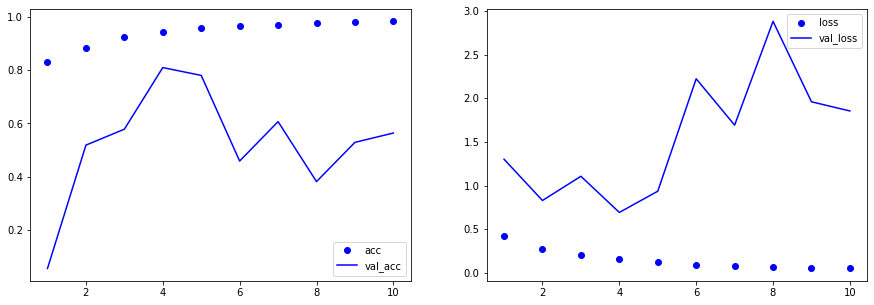

In [36]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

score = ['acc', 'loss']
val_score = [f'val_{i}' for i in score]

epochs = range(1, 11)

plt.figure(figsize = (15, 5))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.plot(epochs, eval(score[i]), 'bo', label = score[i])
    plt.plot(epochs, eval(val_score[i]), 'b', label = val_score[i])
    plt.legend()
plt.show()

- 아주 엉망임
- 정확도 80프로 가량으로 성능이 잘 올라가나 했더니, 바로 과대적합이 옴
    - 이유는 LSTM은 시퀀스 모델인 만큼 전체적으로 길게 분석하는 것을 잘하기 때문에 감성분석 자체가 LSTM의 주분야가 아님.
    - 또, 임베딩 차원이나 LSTM 출력 차원 같은 하이퍼파라미터 튜닝을 전혀 하지 않았기 때문에!!!!
    이런 과대적합이 나타난 것 